# Basic Knowledge in Computer Vision

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Image Types

Load a color image, convert it to a grayscale, binary imagesrespectively, then display them.

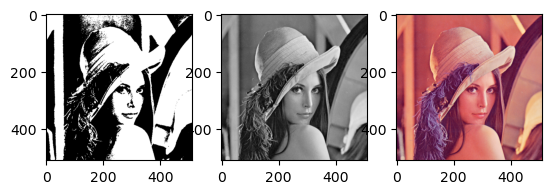

In [2]:
path = 'Images'
img_filePath = os.path.join(path, "Lena.png")
img_color = cv2.imread(img_filePath)

img_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) # Opencv uses BGR
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY) # Gray image
ret, img_binary = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY) # Binary image

# Plot images
plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(img_binary, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(img_gray, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(img_RGB)
plt.show()

## Image File Formats

Load a color image in Python and resize it to half (e.g.,from 512x512 to 256x256), then convert it to grayscale and binaryimages respectively. Finally save them to bmp and jpeg format filesrespectively.Compare the file size of bmp and jpeg formats.

In [3]:
# Configuration for output format and destination
savedExt = ".jpg"
savedPath = 'Images/File-Formats-Practice'
path = 'Images'
img_filePath = os.path.join(path, "Lena.png")

# Resize image to a standard square dimension
img_color = cv2.resize(img_color, (256, 256))

# Convert colors
img_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) # Opencv uses BGR
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY) # Gray image
_,img_binary = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY) # Binary image

# Save images using matplotlib
plt.imsave(img_filePath+"_color"+savedExt, img_RGB)
plt.imsave(img_filePath+"_gray"+savedExt, img_gray, cmap = "gray")
plt.imsave(img_filePath+"_binary"+savedExt, img_binary, cmap = "gray")
#cv2.imwrite(img_filePath+"_color"+savedExt, img_color)
#cv2.imwrite(img_filePath+"_gray"+savedExt, img_gray)
#cv2.imwrite(img_filePath+"_binary"+savedExt, img_binary)

## Histogram

Read a color image, convert it to a grayscale, binary images respectively, and displaythem. Then show their histograms.

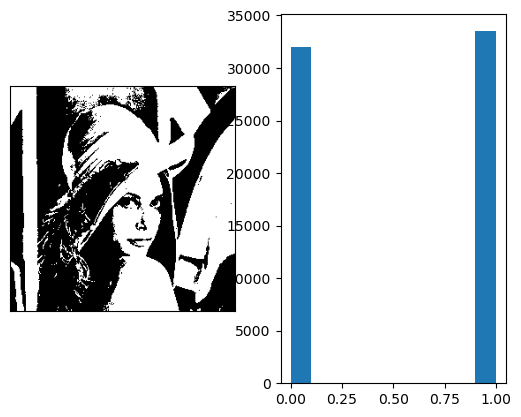

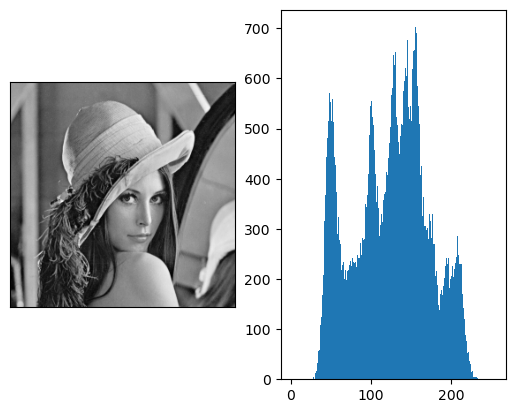

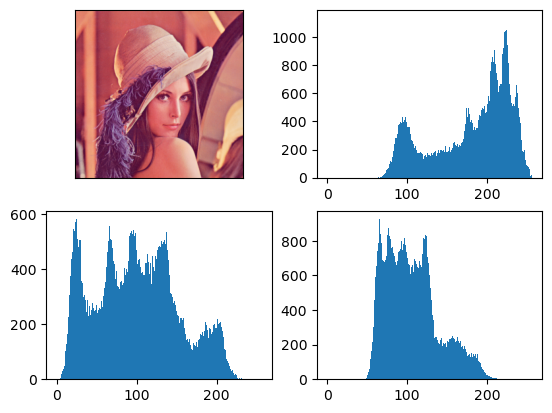

In [4]:
img_binary = img_binary / 255 # convert to 0 and 1

# Plot binary image and its histogram
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.hist(img_binary.ravel())
plt.show()

# Plot gray image and its histogram
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), bins=256, range=[0, 256])
plt.show()

# Plot color image and histograms of three channels
plt.figure(3)
plt.subplot(2, 2, 1)
plt.imshow(img_RGB)
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.hist(img_color[:, :, 2].ravel(), bins=256, range=[0, 256])
plt.subplot(2, 2, 3)
plt.hist(img_color[:, :, 1].ravel(), bins=256, range=[0, 256])
plt.subplot(2, 2, 4)
plt.hist(img_color[:, :, 0].ravel(), bins=256, range=[0, 256])
plt.show()

Pixel permutation of the gray image.

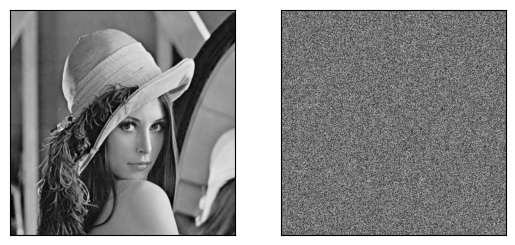

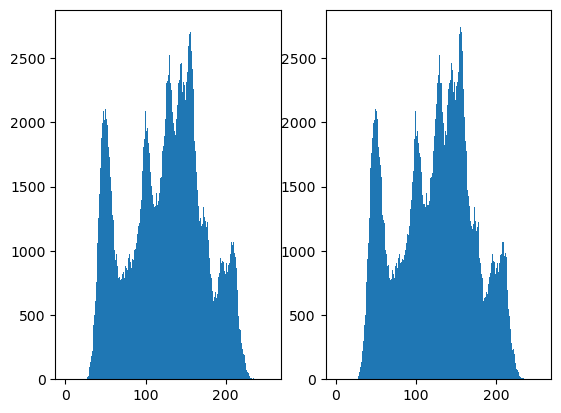

In [5]:
img_color = cv2.imread(img_filePath)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Flatten the image into a column vector, permute pixels randomly and reshape back to 512x512
img_gray_stretched = img_gray.reshape(np.prod(img_gray.shape), 1)
img_gray_randperm = img_gray_stretched[np.random.permutation(np.prod(img_gray.shape))].reshape(512, 512)

# Compare Original Gray vs Scrambled 
plt.figure(4)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img_gray_randperm, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Compare Histograms (Original vs Scrambled)
plt.figure(5)
plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), bins=256, range=[0, 256])
plt.subplot(1, 2, 2)
plt.hist(img_gray_randperm.ravel(), bins=256, range=[0, 256])
plt.show()

Read a demo image, and enhance contrast using histogramequalization, then show the comparison before and after histogramequalization and their histograms respectively.

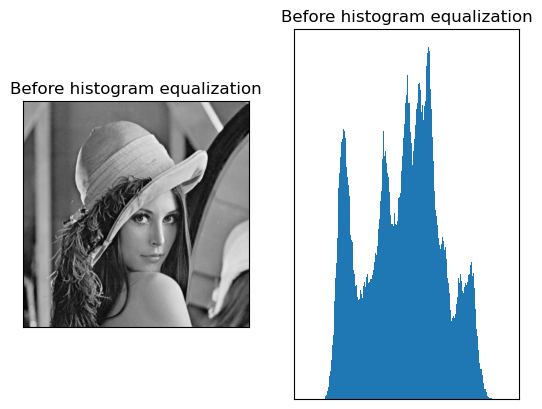

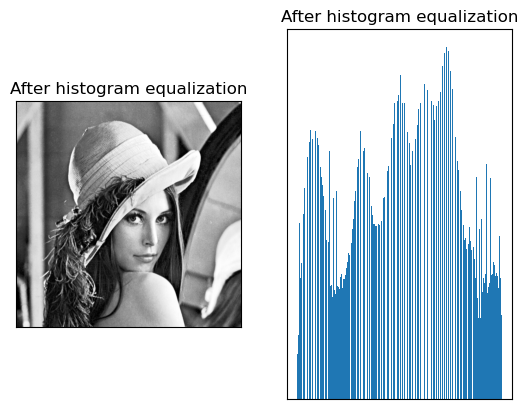

In [6]:
# Apply Histogram Equalization
img_histEqualization = cv2.equalizeHist(img_gray)

# Original Image and Histogram
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Before histogram equalization")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), bins=256, range=[0, 256])
plt.title("Before histogram equalization")
plt.xticks([])
plt.yticks([])
plt.show()

# Equalized Image and Histogram
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(img_histEqualization, cmap='gray')
plt.title("After histogram equalization")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.hist(img_histEqualization.ravel(), bins=256, range=[0, 256])
plt.title("After histogram equalization")
plt.xticks([])
plt.yticks([])
plt.show()

## Edge detection
Read a demo image, and enhance contrast using histogram equalization, then show the comparison before and after histogram equalization and their histograms respectively.

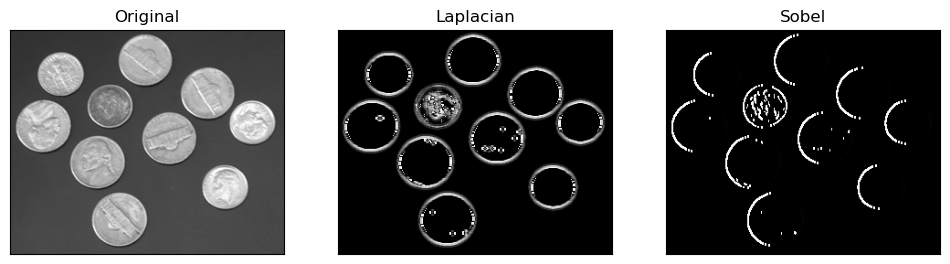

In [7]:
#from scipy.ndimage.filters import gaussian_laplace, sobel
from scipy.ndimage import gaussian_laplace, sobel

path = ""
imgFilename = os.path.join(path, "Images/coins.png")
img_org = cv2.imread(imgFilename)

# Color conversion
img_RGB = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB) # Opencv uses BGR
img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY) # Gray image

# Binary thresholding
_, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY) # Binary image

# Apply filters
edge_laplacian = gaussian_laplace(img_binary, sigma=1)
edge_sobel = sobel(img_binary)

# Plotting results
plt.figure(figsize=(12, 4)) # Optional: makes the figure wider for 3 subplots

# Original
plt.subplot(1, 3, 1)
plt.imshow(img_RGB)
plt.title('Original')
plt.xticks([])
plt.yticks([])

# Laplacian Filter
plt.subplot(1, 3, 2)
plt.imshow(edge_laplacian, cmap='gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])

# Sobel Filter
plt.subplot(1, 3, 3)
plt.imshow(edge_sobel, cmap='gray')
plt.title('Sobel')
plt.xticks([])
plt.yticks([])

plt.show()

## Convolution
Read the Lena image and convert it to a gray image, and add a ‘salt and pepper’ noise, then denoise it using conv2 with a Gaussian kernel and a median filter, respectively.

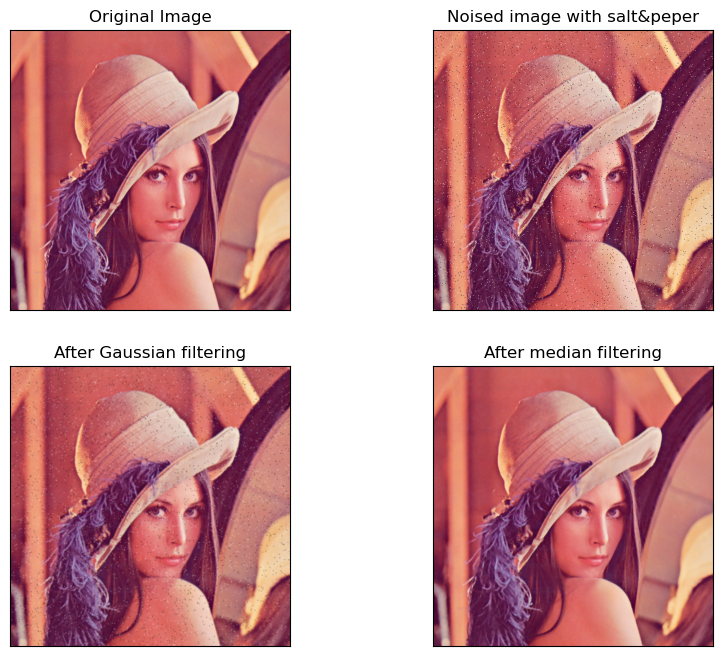

In [8]:
path = 'Images'
img_filePath = os.path.join(path, "Lena.png")
img_color = cv2.imread(img_filePath)
img_org = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) 

def add_salt_and_pepper(gb, prob):
    '''
    Adds "Salt & Pepper" noise to an image. 
    gb: should be one-channel image; 
    prob: probability (threshold) that controls level of noise
    '''
    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy

# Add noise to the image
img_sp = add_salt_and_pepper(img_org, 0.01)

# Apply Gaussian and Median Blur
img_gaussianfiltered = cv2.GaussianBlur(img_sp, (3,3), 0)
img_medianfiltered = cv2.medianBlur(img_sp, ksize=3)

# Plotting Results
plt.figure(figsize=(10, 8))

# Subplot 1: Original
plt.subplot(2, 2, 1)
plt.imshow(img_org, cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

# Subplot 2: Salt & Pepper Noise
plt.subplot(2, 2, 2)
plt.imshow(img_sp, cmap='gray')
plt.title("Noised image with salt&peper")
plt.xticks([])
plt.yticks([])

# Subplot 3: Gaussian Filter
plt.subplot(2, 2, 3)
plt.imshow(img_gaussianfiltered, cmap='gray')
plt.title("After Gaussian filtering")
plt.xticks([])
plt.yticks([])

# Subplot 4: Median Filter
plt.subplot(2, 2, 4)
plt.imshow(img_medianfiltered, cmap='gray')
plt.title("After median filtering")
plt.xticks([])
plt.yticks([])

plt.show()

## Frequency Domain Filtering

Read a gray Lena image, try low and highpass Gaussian filtering in the frequency domain.

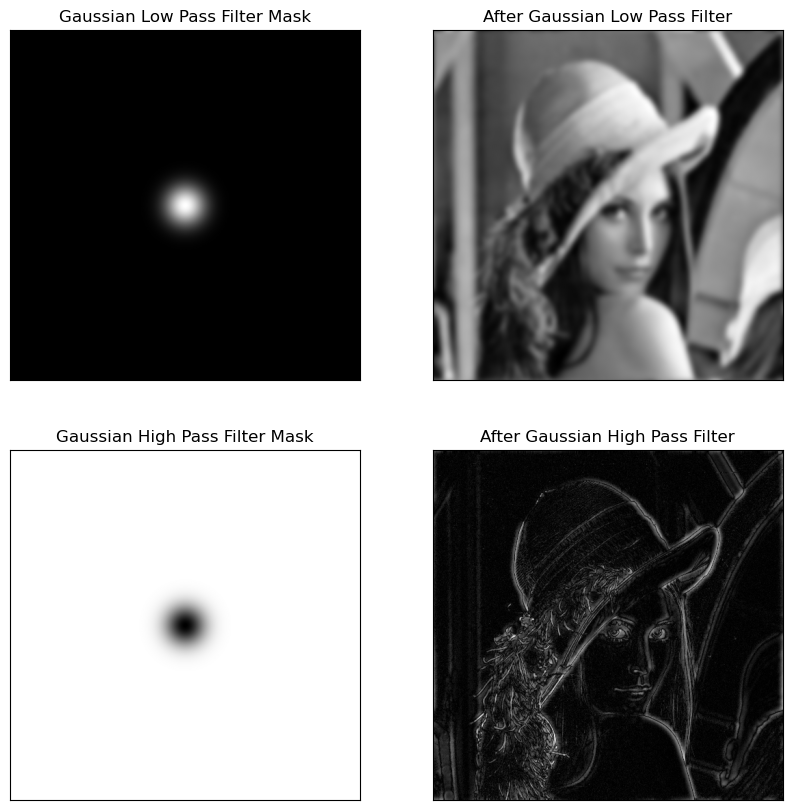

In [9]:
# Helper function to normalize image
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

# Convert to grayscale
img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY) 

# Normalize and Compute FFT
I = im2double(img_gray)
I1 = np.fft.fft2(I) # Compute 2D Fourier Transform
I1_fftshift = np.fft.fftshift(I1) # Shift zero frequency component to the center

# Image dimensions
imgWidth = img_gray.shape[0]
imgHeight = img_gray.shape[1]
center_width = imgWidth / 2
center_height = imgHeight / 2

# Filter parameters
D0 = 20 # Cut-off frequency
gaussian_lowPass_filter = np.zeros((imgWidth, imgHeight))
gaussian_highPass_filter = np.zeros((imgWidth, imgHeight))

# Generate Gaussian Filters (Low Pass and High Pass)
for rowI in range(imgWidth):
    for colJ in range(imgHeight):
        # Distance to the center of the image
        D = np.sqrt((rowI - center_width)**2 + (colJ - center_height)**2) 
        
        # Gaussian Low Pass Formula
        gaussian_lowPass_filter[rowI, colJ] = np.exp(-D**2 / (2 * (D0**2)))
        
        # Gaussian High Pass
        gaussian_highPass_filter[rowI, colJ] = 1 - gaussian_lowPass_filter[rowI, colJ]

# Apply Low Pass Filter in Frequency Domain
img_gray_filtered_lowpass = np.fft.ifftshift(np.multiply(I1_fftshift, gaussian_lowPass_filter))
img_gray_filtered_lowpass = abs(np.fft.ifft2(img_gray_filtered_lowpass))

# Apply High Pass Filter in Frequency Domain
img_gray_filtered_highpass = np.fft.ifftshift(np.multiply(I1_fftshift, gaussian_highPass_filter))
img_gray_filtered_highpass = abs(np.fft.ifft2(img_gray_filtered_highpass))

plt.figure(figsize=(10, 10))

# 1. Low Pass Filter Mask
plt.subplot(2, 2, 1)
plt.imshow(gaussian_lowPass_filter, cmap='gray')
plt.title('Gaussian Low Pass Filter Mask')
plt.xticks([]), plt.yticks([])

# 2. Low Pass Result
plt.subplot(2, 2, 2)
plt.imshow(img_gray_filtered_lowpass, cmap='gray')
plt.title('After Gaussian Low Pass Filter')
plt.xticks([]), plt.yticks([])

# 3. High Pass Filter Mask
plt.subplot(2, 2, 3)
plt.imshow(gaussian_highPass_filter, cmap='gray')
plt.title('Gaussian High Pass Filter Mask')
plt.xticks([]), plt.yticks([])

# 4. High Pass Result
plt.subplot(2, 2, 4)
plt.imshow(img_gray_filtered_highpass, cmap='gray')
plt.title('After Gaussian High Pass Filter')
plt.xticks([]), plt.yticks([])

plt.show()